In [1]:
import numpy as np
import math
import h5py
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import ipywidgets as widgets
rcParams['font.size'] = 20
rcParams['font.family'] = 'sans-serif'
import json

In [2]:
f=h5py.File('pressure_history.hdf5')
p=np.array(f['pressure_np1'])
f.close()

In [3]:
p.shape
# get data
with open("data.json") as f:
  data = json.load(f)

xmin = data["xmin"]
xmax = data["xmax"]
ymin = data["ymin"]
ymax = data["ymax"]
zmin = data["zmin"]
zmax = data["zmax"]

(165, 4492125)

In [5]:
ndt = p.shape[0]
nx = data["nx_elem"] + 1
ny = data["ny_elem"] + 1
nz = data["nz_elem"] + 1
p=np.reshape(p,(ndt,nx,ny,nz))
print(p.shape)

(165, 165, 165, 165)


interactive(children=(IntSlider(value=82, description='it', max=164), Text(value='figure', description='output…

<function __main__.plotWfld(d, it, output='figure', save=False)>

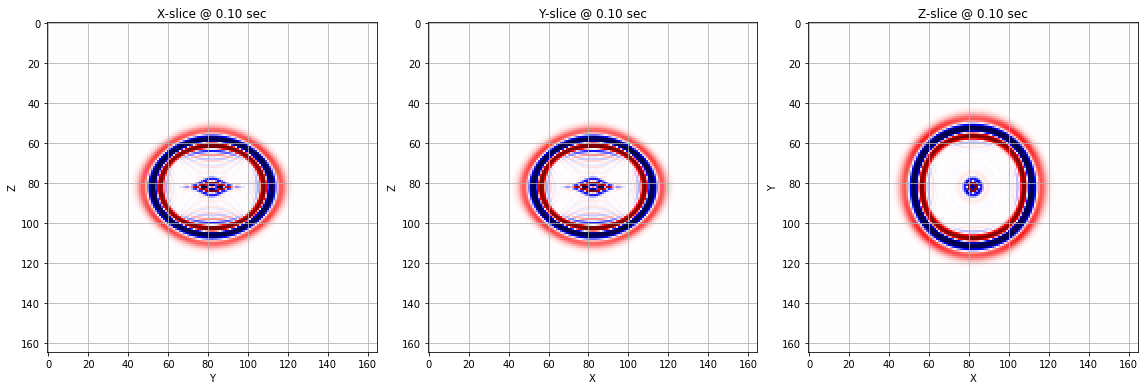

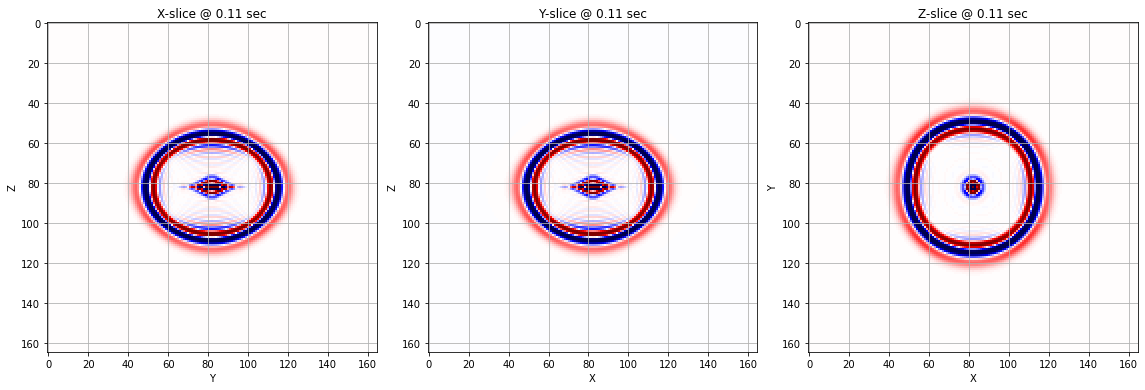

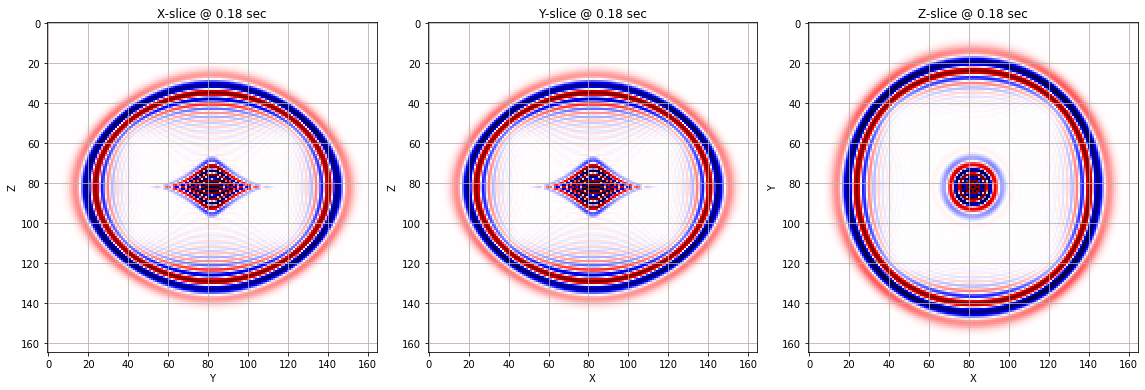

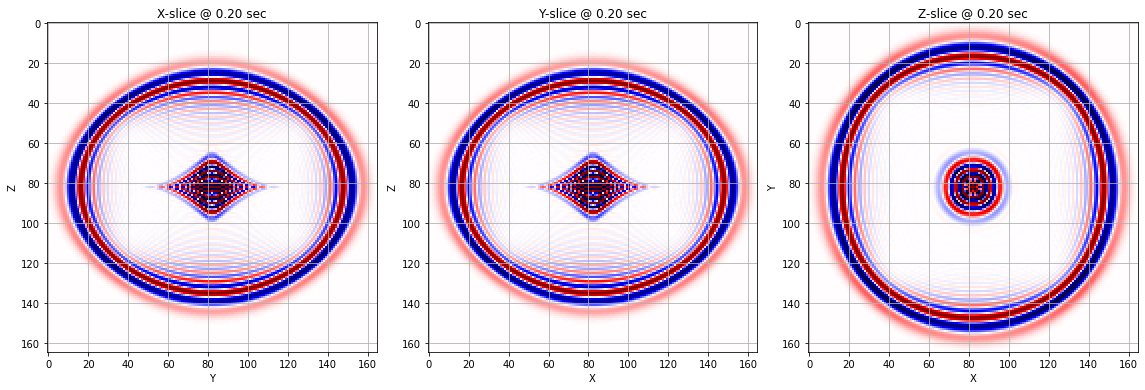

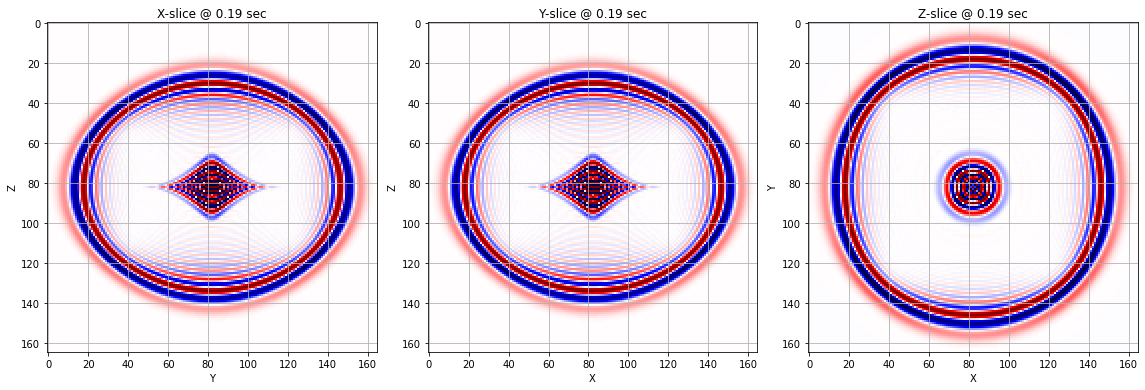

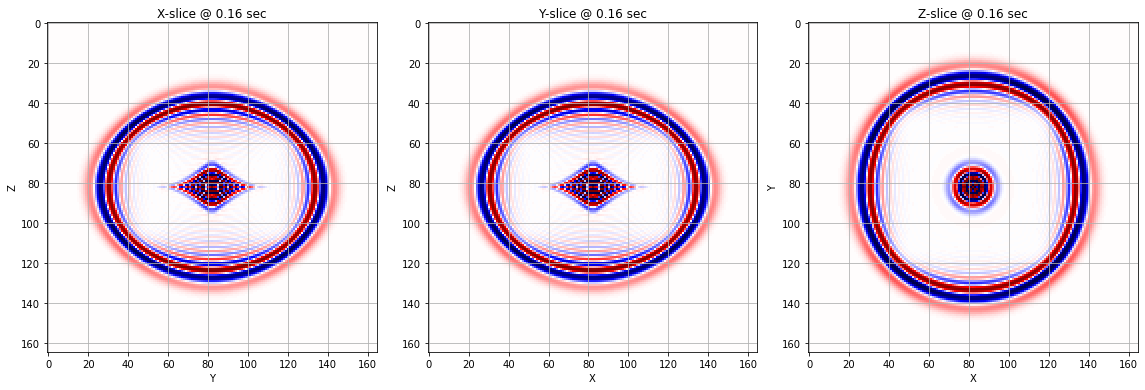

In [6]:
%matplotlib inline
d=p
dt=data["dt_hdf5"]
ix=int(nx/2)
iy=int(ny/2)
iz=int(nz/2)

nt=ndt
# ixmin=15
# ixmax=nx-1-ixmin
# iymin=15
# iymax=ny-1-iymin
# izmin=15
# izmax=nz-1-izmin

def plotWfld(d,it,output="figure",save=False):

    vmax=np.percentile(np.abs(d[it,::]), 99.5)
    time=it*dt
    plt.figure(figsize=(16,6))
    plt.subplot(1,3,1)
    plt.imshow(np.transpose(d[it,ix,:,:]),vmin=-vmax,vmax=vmax,cmap='seismic', extent=[ymin, ymax, zmin, zmax])
    plt.grid(visible=True)
    #plt.hlines((izmin,izmax),iymin,iymax,LineStyle='--')
    #plt.vlines((iymin,iymax),izmin,izmax,LineStyle='--')
    plt.xlabel("Y")
    plt.ylabel("Z")
    plt.title(r"X-slice @ %0.2f sec" %time)

    plt.subplot(1,3,2)
    plt.imshow(np.transpose(d[it,:,iy,:]),vmin=-vmax,vmax=vmax,cmap='seismic', extent=[xmin, xmax, Zmin, zmax])
    plt.grid(visible=True)
    #plt.hlines((izmin,izmax),ixmin,ixmax,LineStyle='--')
    #plt.vlines((ixmin,ixmax),izmin,izmax,LineStyle='--')
    plt.xlabel("X")
    plt.ylabel("Z")
    plt.title(r"Y-slice @ %0.2f sec" %time)

    plt.subplot(1,3,3)
    plt.imshow(np.transpose(d[it,:,:,iz]),vmin=-vmax,vmax=vmax,cmap='seismic', extent=[xmin, xmax, ymin, ymax])
    plt.grid(visible=True)
    #plt.hlines((iymin,iymax),ixmin,ixmax,LineStyle='--')
    #plt.vlines((ixmin,ixmax),iymin,iymax,LineStyle='--')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(r"Z-slice @ %0.2f sec" %time)

    plt.tight_layout()
    if save==True:
        plt.savefig("./fig/"+output+"_%d" %it)
    
widgets.interact(plotWfld, d=widgets.fixed(d), it=(0,nt-1,1))